In [1032]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1033]:
df = pd.read_csv('laptop_data.csv')

In [1034]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1035]:
df.shape

(1303, 12)

In [1036]:
df.duplicated().sum()


0

In [1037]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1038]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [1039]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1040]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [1041]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float32')

In [1042]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int64(1), object(7)
memory usage: 107.0+ KB


In [1043]:
import seaborn as sns

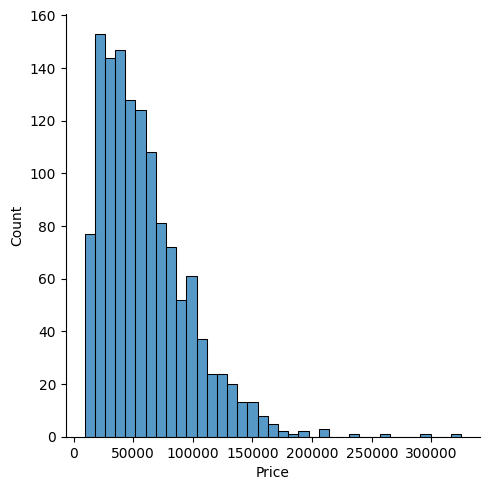

In [1044]:
sns.displot(df['Price'])


<Axes: xlabel='Company'>

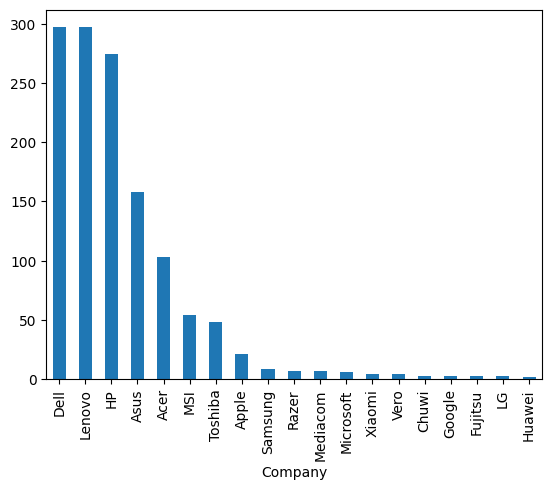

In [1045]:
df['Company'].value_counts().plot(kind='bar')


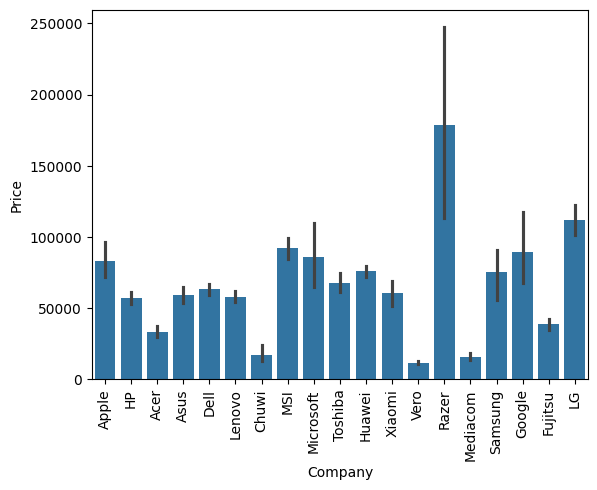

In [1046]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

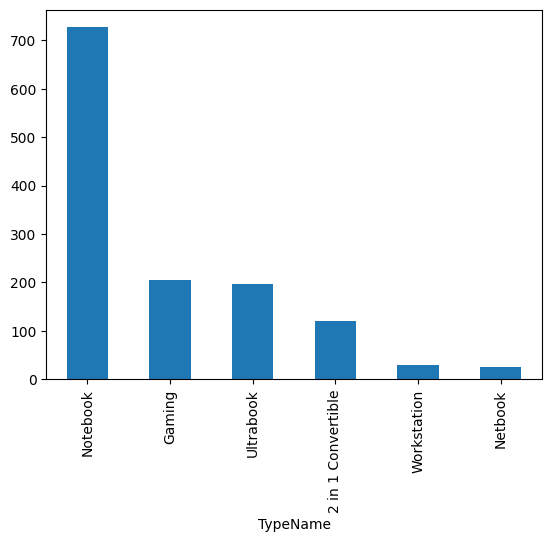

In [1047]:
df['TypeName'].value_counts().plot(kind='bar')

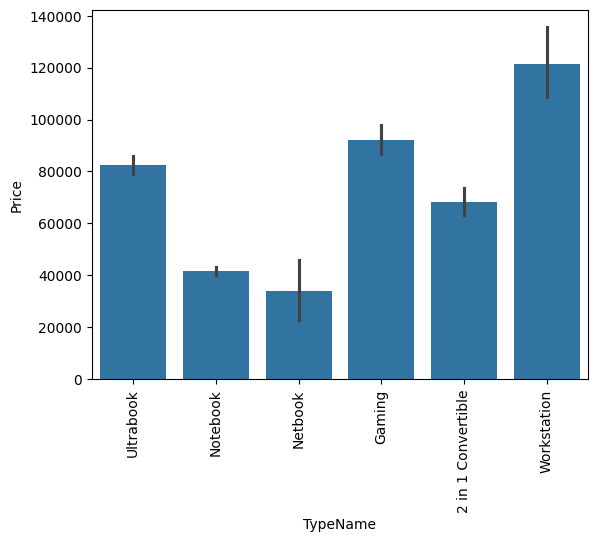

In [1048]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

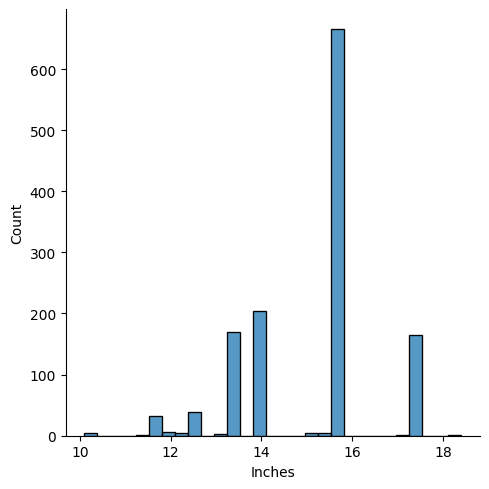

In [1049]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

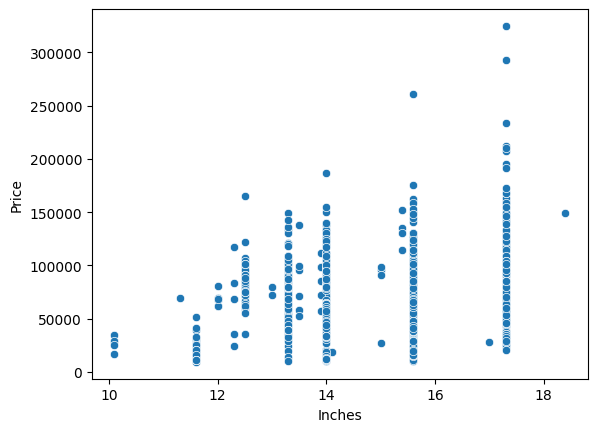

In [1050]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [1051]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [1052]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [1053]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

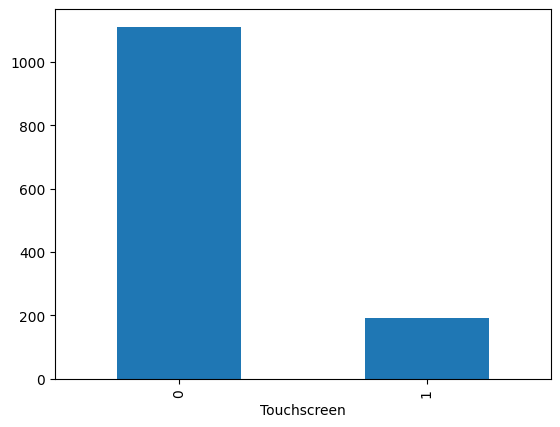

In [1054]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
dtypes: float32(1), float64(2), int64(2), object(7)
memory usage: 117.2+ KB


<Axes: xlabel='Touchscreen', ylabel='Price'>

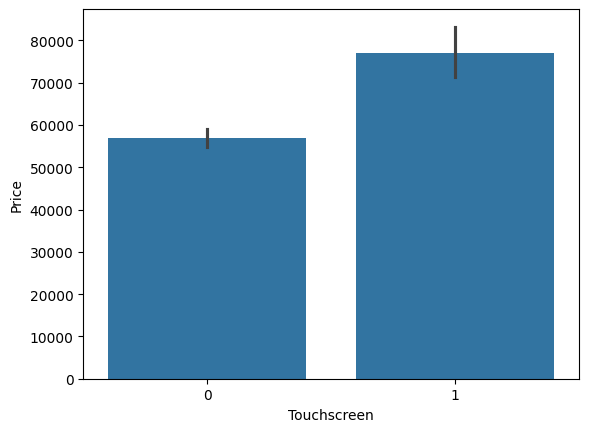

In [1056]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [1057]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips', ylabel='Price'>

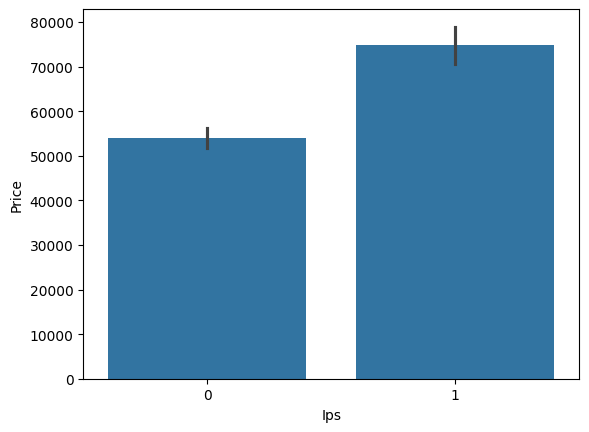

In [1058]:
sns.barplot(x=df['Ips'],y=df['Price'])

<Axes: xlabel='Ips'>

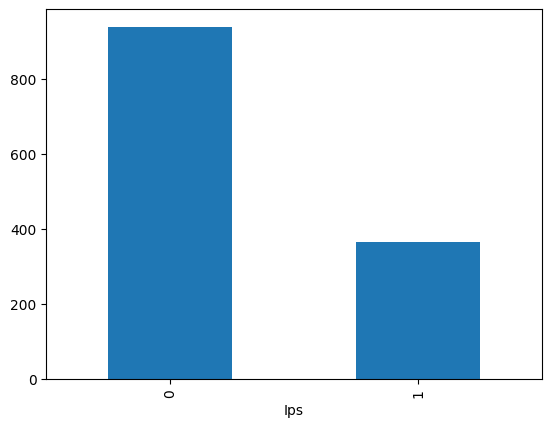

In [1059]:
df['Ips'].value_counts().plot(kind='bar')

In [1060]:
new =df['ScreenResolution'].str.split('x', n=1 , expand=True)


In [1061]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [1062]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [1063]:
df['X_res']  = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [1064]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [1065]:
df['X_res'] = df['X_res'].astype('int64')
df['Y_res'] = df['Y_res'].astype('int64')
df['Price'] = df['Price'].astype('int64')

In [1066]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(1), int64(6), object(7)
memory usage: 147.7+ KB


In [1067]:
df['Ppi'] = (((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'].astype('int64')).astype('int64')

In [1068]:
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols].corr()['Price']

Ram            0.743007
Price          1.000000
Touchscreen    0.191226
Ips            0.252207
X_res          0.556529
Y_res          0.552809
Ppi            0.464110
Name: Price, dtype: float64

In [1069]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600,232
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900,130
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,146
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800,226
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600,232


In [1070]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [1071]:
df.drop(columns=['X_res'], inplace=True)
df.drop(columns=['Y_res'], inplace=True)
df.drop(columns=['Inches'], inplace=True)

In [1072]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232


In [1073]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [1074]:
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [1075]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232


In [1076]:
def fetch_processor(text):
    if text== 'Intel Core i7' or text =='Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'other Intel processor'
        else:
            return 'AMD Processor'


In [1077]:
df['Cpu'] = df['Cpu'].apply(fetch_processor) 

In [1078]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232


<Axes: xlabel='Cpu'>

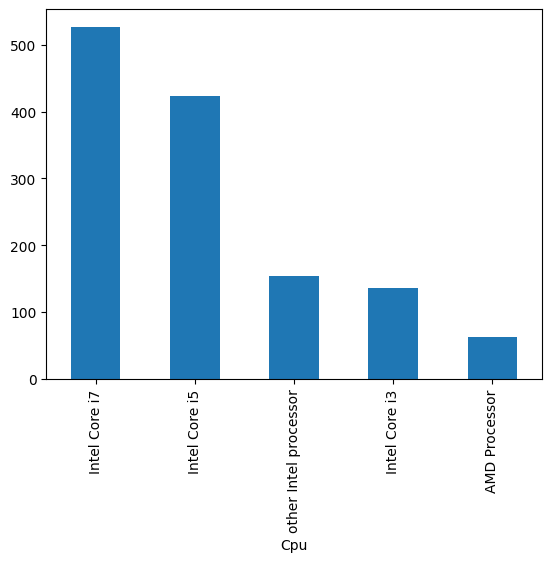

In [1079]:
df['Cpu'].value_counts().plot(kind='bar')

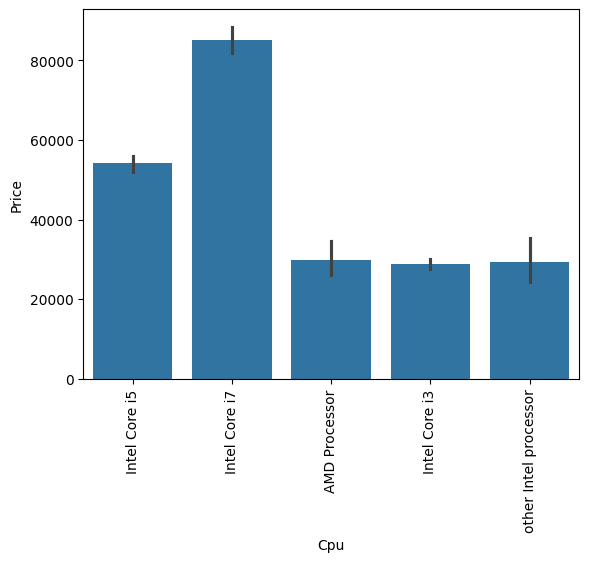

In [1080]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1081]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232


<Axes: xlabel='Ram'>

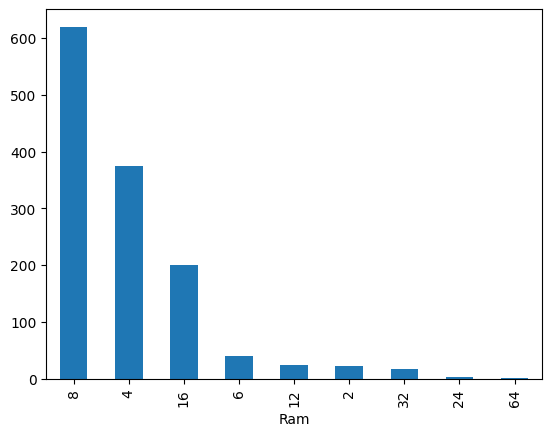

In [1082]:
df['Ram'].value_counts().plot(kind='bar')

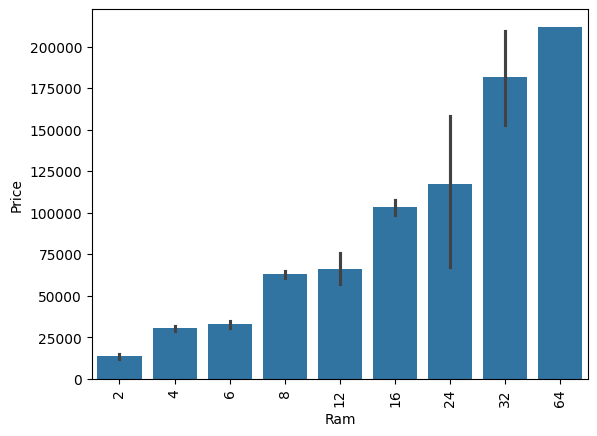

In [1083]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Memory'>

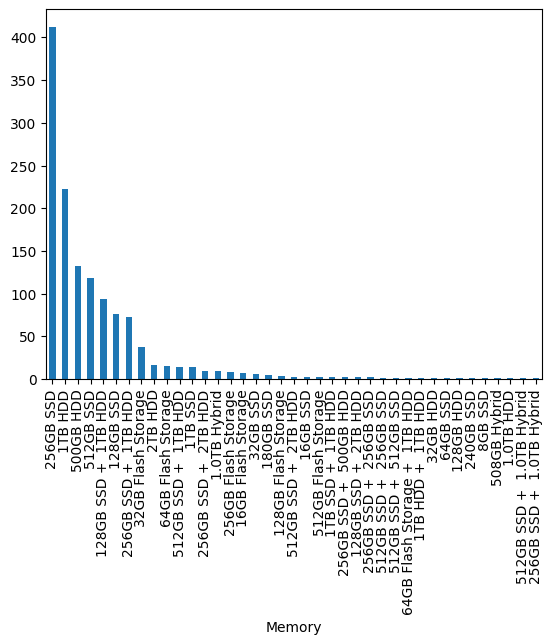

In [1084]:
df['Memory'].value_counts().plot(kind='bar')

In [1085]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)



In [1086]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()



In [1087]:
df["second"]= new[1]



In [1088]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)



In [1089]:
df['first'] = df['first'].str.replace(r'\D', '')



In [1090]:
df["second"].fillna("0", inplace = True)



C:\Users\vaibhab garg\AppData\Local\Temp\ipykernel_23904\3936603369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [1091]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)



In [1092]:
df['second'] = df['second'].str.replace(r'\D', '')



In [1093]:
df['second'] = df['second'].str.replace(r'\D', '')


In [1094]:
df["first"] = df["first"]
df["second"] = df["second"]



In [1095]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [1096]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232,,128 SSD,,
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130,,,,128 Flash Storage
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146,,256 SSD,,
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226,,512 SSD,,
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232,,256 SSD,,


In [1097]:
import re

In [1098]:
df['HDD'] = df['Memory'].apply(lambda x: int(re.findall(r'(\d+) HDD', x)[0]) if 'HDD' in x else 0)
df['SSD'] = df['Memory'].apply(lambda x: int(re.findall(r'(\d+) SSD', x)[0]) if 'SSD' in x else 0)
df['Hybrid'] = df['Memory'].apply(lambda x: int(re.findall(r'(\d+) Hybrid', x)[0]) if 'Hybrid' in x else 0)
df['Flash_Storage'] = df['Memory'].apply(lambda x: int(re.findall(r'(\d+) Flash Storage', x)[0]) if 'Flash Storage' in x else 0)

In [1099]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232,0,128,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130,0,0,0,128
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,146,0,256,0,0
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226,0,512,0,0
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232,0,256,0,0


In [1100]:
df.drop(columns=['Memory'], inplace = True)

In [1101]:
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols].corr()['Price']

Ram              0.743007
Price            1.000000
Touchscreen      0.191226
Ips              0.252207
Ppi              0.464110
HDD             -0.095672
SSD              0.676202
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [1102]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace = True)

In [1103]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130,0,0
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,146,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232,0,256


In [1104]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

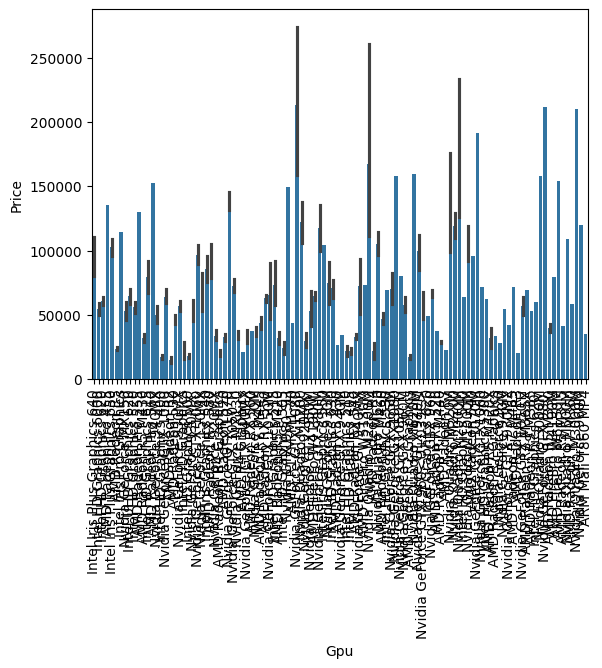

In [1105]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1106]:
df['Gpu_brand']= df['Gpu'].apply(lambda x: x.split()[0])

In [1107]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,232,0,128,Intel
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,130,0,0,Intel
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,146,0,256,Intel
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,226,0,512,AMD
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,232,0,256,Intel


<Axes: xlabel='Gpu_brand'>

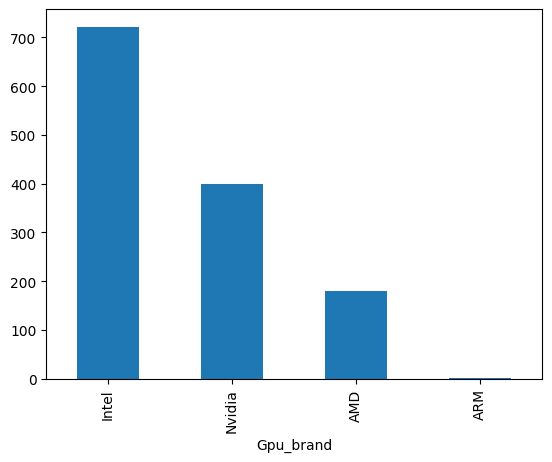

In [1108]:
df['Gpu_brand'].value_counts().plot(kind='bar')

In [1109]:
df = df[df['Gpu_brand']!= 'ARM']

<Axes: xlabel='Gpu_brand'>

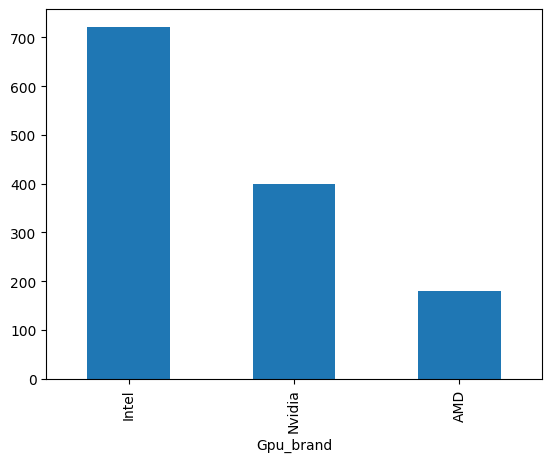

In [1110]:
df['Gpu_brand'].value_counts().plot(kind='bar')

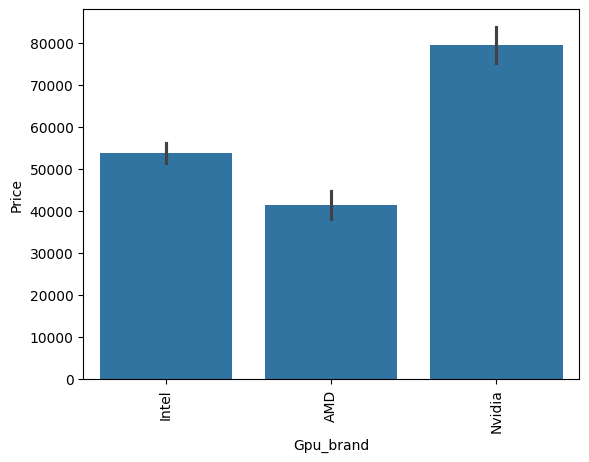

In [1111]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1112]:
df.drop(columns=['Gpu'], inplace=True)

In [1113]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

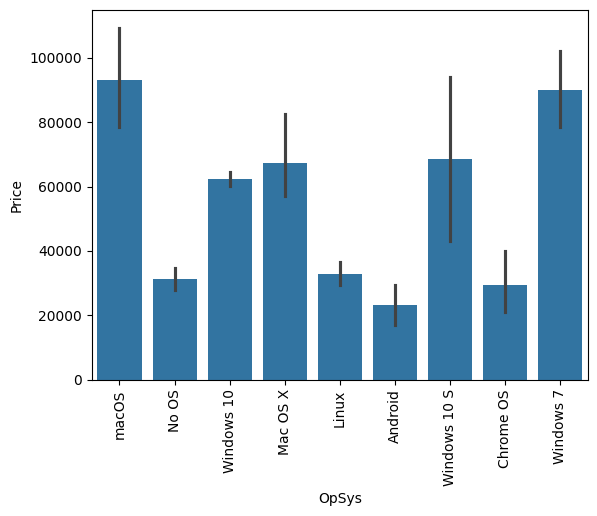

In [1114]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1115]:
def get_os(text):
    if text== 'Windows 10'or text =='Windows 7' or text == 'Windows 10 S':
        return 'windows'
    
    elif text =='Mac OS X ' or text == 'macOS':
        return 'Mac'
    else:
        return 'Others/No os/ Linux'

In [1116]:
df['Os'] = df['OpSys'].apply(get_os)

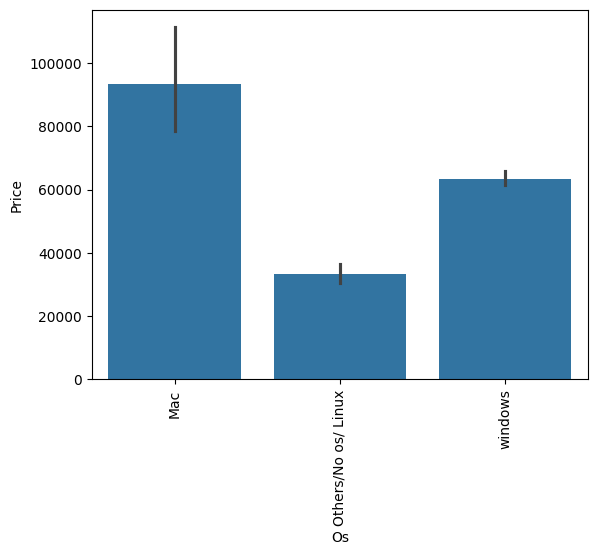

In [1117]:

sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1118]:
df.drop(columns='OpSys',inplace=True)

In [1119]:
df.head()

,Company,TypeName,Cpu,Ram,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,8,1.37,71378,0,1,232,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,8,1.34,47895,0,0,130,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5,8,1.86,30636,0,0,146,0,256,Intel,Others/No os/ Linux
3,Apple,Ultrabook,Intel Core i7,16,1.83,135195,0,1,226,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,8,1.37,96095,0,1,232,0,256,Intel,Mac


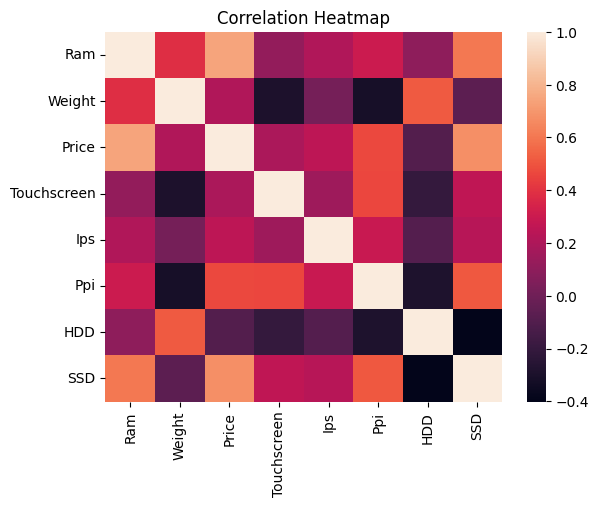

In [1120]:

numeric_cols = df.select_dtypes(include='number')


sns.heatmap(numeric_cols.corr())
plt.title('Correlation Heatmap')
plt.show()

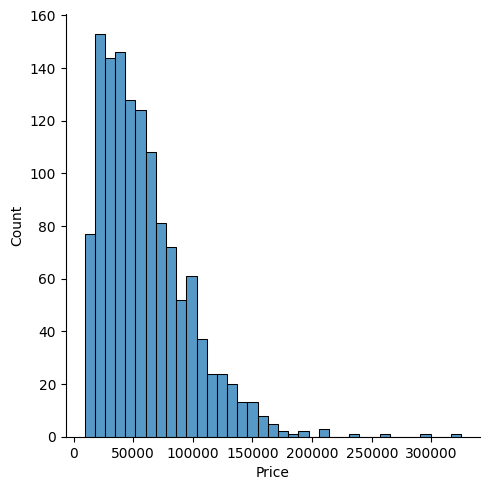

In [1121]:
sns.displot(df['Price'])

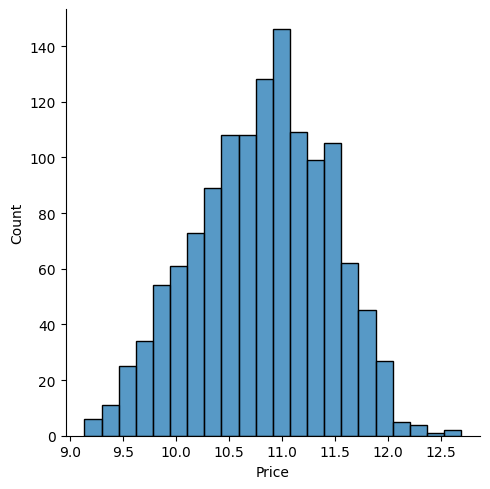

In [1122]:
sns.displot(np.log(df['Price']))

In [1123]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [1124]:
X

,Company,TypeName,Cpu,Ram,Weight,Touchscreen,Ips,Ppi,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,8,1.37,0,1,232,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,8,1.34,0,0,130,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5,8,1.86,0,0,146,0,256,Intel,Others/No os/ Linux
3,Apple,Ultrabook,Intel Core i7,16,1.83,0,1,226,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,8,1.37,0,1,232,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,4,1.80,1,1,157,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,Intel Core i7,16,1.30,1,1,282,0,512,Intel,windows
1300,Lenovo,Notebook,other Intel processor,2,1.50,0,0,111,0,0,Intel,windows
1301,HP,Notebook,Intel Core i7,6,2.19,0,0,104,1000,0,AMD,windows


In [1125]:
Y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [1126]:
from sklearn.model_selection import train_test_split

In [1127]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15, random_state=2)

In [1128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error

In [1130]:
step1= ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder( drop='first'), [0,1,2,10,11])

], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2_score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

r2_score 0.8069765736908058
MAE 0.2091998458884249


In [1135]:
np.exp(0.21)

1.2336780599567432

In [1136]:
from sklearn.ensemble import RandomForestRegressor

In [1148]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=4,max_samples=0.6,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8911590464615061
MAE 0.1532620489740637


In [1149]:
import pickle

In [1150]:
pickle.dump(df,open('df.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl', 'wb'))

In [1151]:
df.head()

,Company,TypeName,Cpu,Ram,Weight,Price,Touchscreen,Ips,Ppi,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,8,1.37,71378,0,1,232,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,8,1.34,47895,0,0,130,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5,8,1.86,30636,0,0,146,0,256,Intel,Others/No os/ Linux
3,Apple,Ultrabook,Intel Core i7,16,1.83,135195,0,1,226,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,8,1.37,96095,0,1,232,0,256,Intel,Mac
